# Milan Kovacs - 21308128, Caoimhe Cahill - 21331308
# The code runs to execution
# References:
- https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification (dataset used)
- https://www.geeksforgeeks.org/plotting-correlation-matrix-using-python/
- https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html 
- http://neuralnetworksanddeeplearning.com/chap1.html  
- https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea 
- https://stackoverflow.com/questions/6282058/writing-numerical-values-on-the-plot-with-matplotlib
- https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/



In [2]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.metrics import confusion_matrix


In [3]:
"""
1. Data sets
The dataset we chose is about mobile phone prices. It contains information like battery power, ram, bluetooth, memory, etc. We want our multi-layer perception to predict phone price range based on key attributes.
"""
# Loading data from csv and printing it
dataset_path = 'phones.csv'
data = pd.read_csv(dataset_path)
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

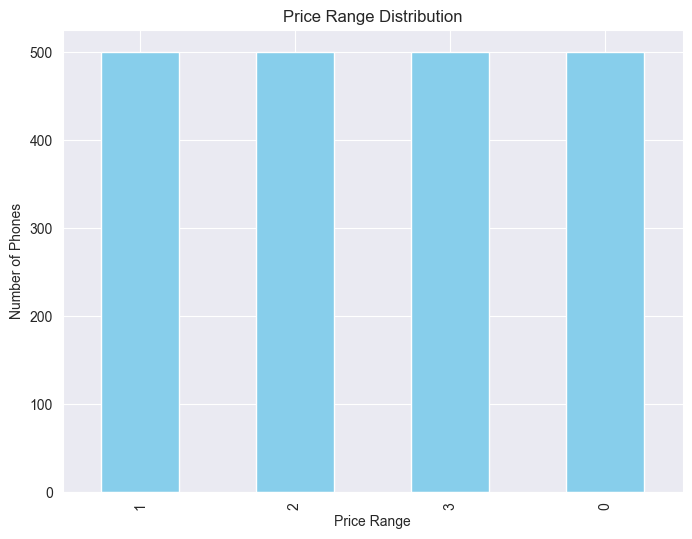

In [7]:
"""
Here, we are counting occurrences of each price range(0, 1, 2, 3).
This bar chart graph shows there's an equal number of examples for each price range.
This helps eliminate bias when training our MLP
"""
price_range_counts = data['price_range'].value_counts()
plt.figure(figsize=(8, 6))
price_range_counts.plot(kind='bar', color='skyblue')
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Phones')
plt.show()

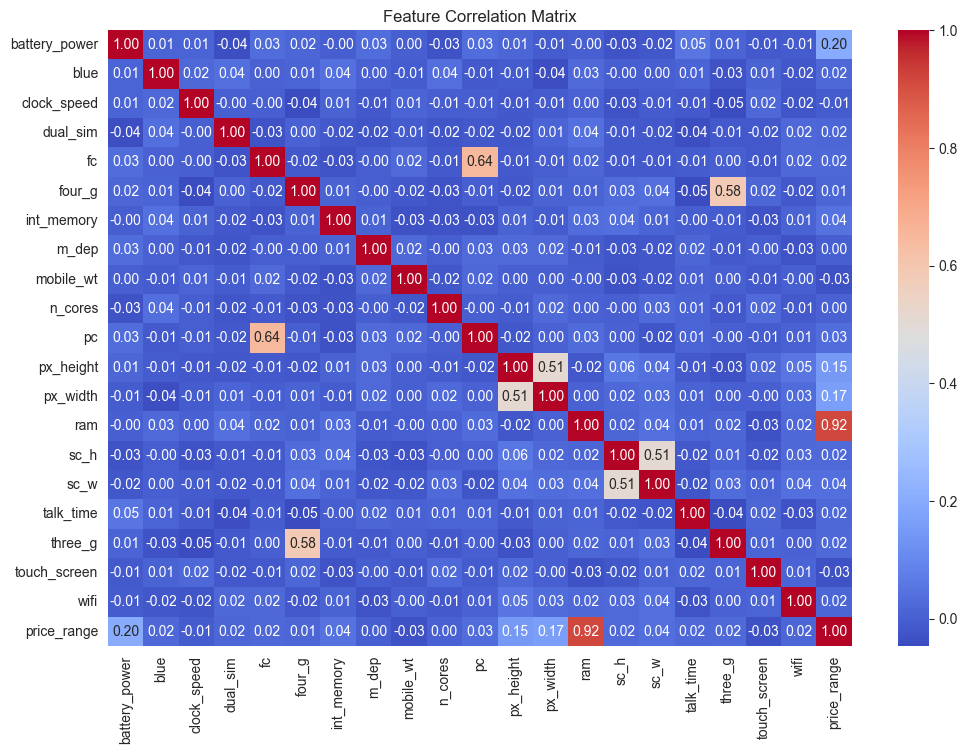

In [45]:
# Analyze feature correlations
"""
This dataset contains alot of features (21 to be exact).
Here, we are creating a correlation matrix to decide what features to use.
We are going to select the features that correlate the most with our target value.
Using just these key features will help us reduce overfitting and improve our models performance.
From this correlation matrix, we can see that battery_power, ram, int_memory, px_width, px_height and sc_w correlate the best with price_rnage
"""
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

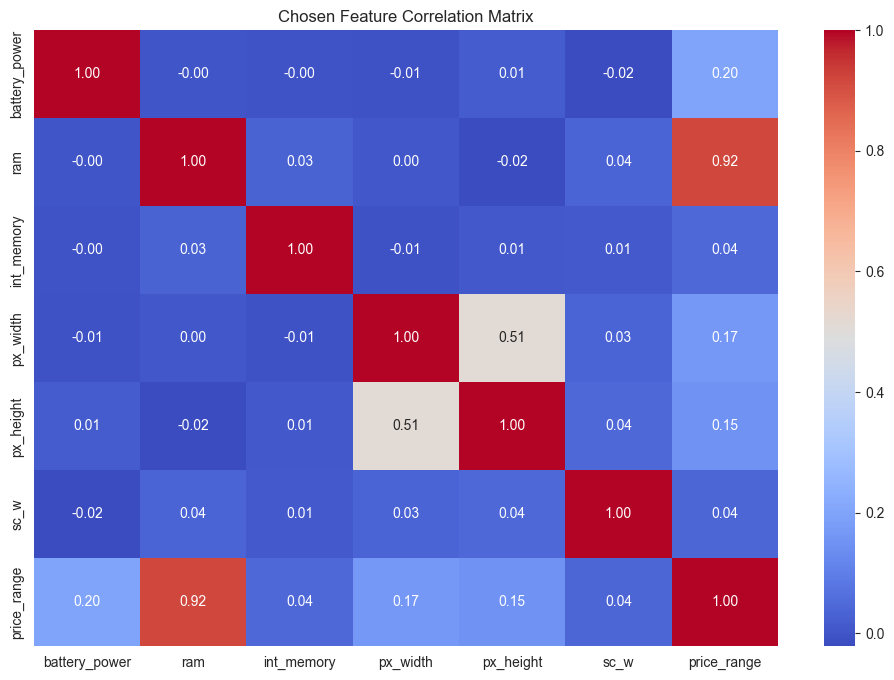

In [46]:
"""
Here is a correlation with just our key features picked out
"""
key_features = data[['battery_power', 'ram', 'int_memory', 'px_width', 'px_height', 'sc_w', 'price_range']]

corr_matrix = key_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Chosen Feature Correlation Matrix')
plt.show()

In [47]:
"""
This function splits a dataset into training and testing sets and normalises the features using MinMax scaling.
It first separates the features (X) from the target (Y), then splits the data using k-fold cross-validation, where the test set size is determined by the specified number of folds (k_folds). 
It normalises the feature values in both the training and testing sets to a range of [0, 1] using MinMaxScaler.
The function returns the normalised training and testing sets (features and target), and also prints their shapes.
"""
def split_and_normalise_data(k_folds=5):
    #Seperate features and target(prediction variable)
    X = data[['battery_power', 'ram', 'int_memory', 'px_width', 'px_height', 'sc_w']]#Features
    Y = data['price_range'] #Target(prediction variable)
    
    #Split data in training set and test set
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 1.0 / k_folds, random_state=42)
    
    # Create a MinMaxScaler for normalisation
    scaler = MinMaxScaler()
    
    # Fit Scaler on sets
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    # Print shapes of the datasets
    print(f"x_train shape: {x_train.shape}")
    print(f"x_test shape: {x_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")
    
    return x_train, x_test, y_train, y_test

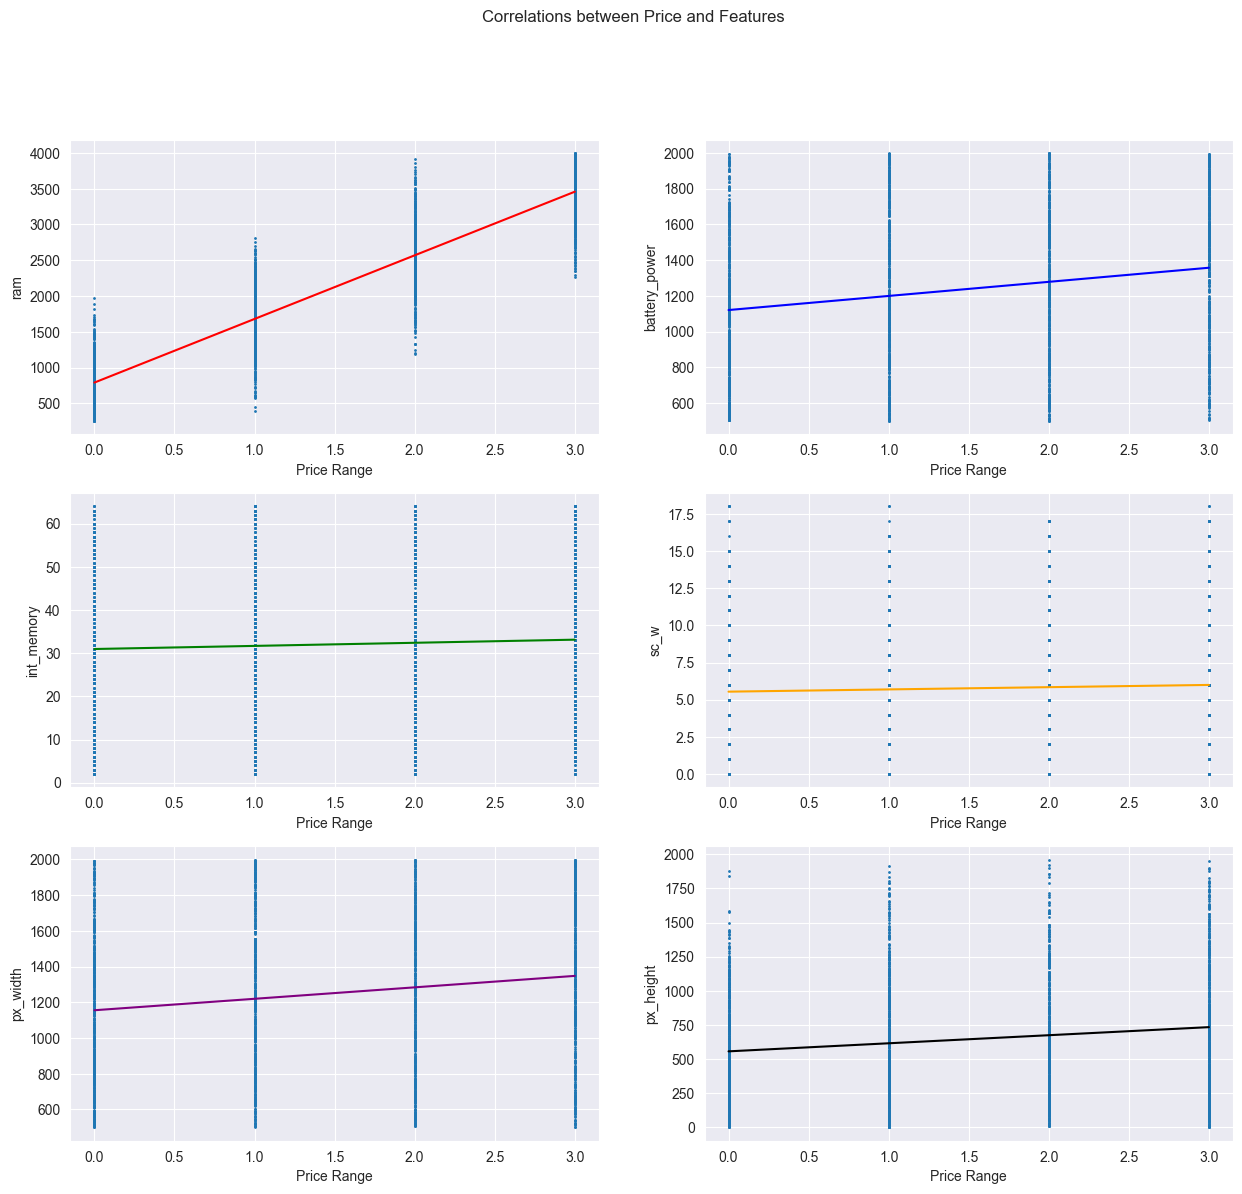

In [48]:
# Correlation between the prices and the features
# https://www.geeksforgeeks.org/plotting-correlation-matrix-using-python/

# Multiple Subplots
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axis = plt.subplots(3,2)       # 3 rows, 2 columns
fig.suptitle('Correlations between Price and Features')
fig.set_figheight(13)
fig.set_figwidth(15)

# Take the features we will be plotting against price
price =         data['price_range']
ram =           data['ram']
batter_power =  data['battery_power']
int_memory =    data['int_memory']
px_width =      data['px_width']
px_height =     data['px_height']
sc_w =          data['sc_w']

data_sets = [ram, batter_power, int_memory, sc_w, px_width, px_height]
colours = ['red', 'blue', 'green', 'orange', 'purple', 'black']
marker_size = 1
marker_symbol = 'o'

i = 0
for row in range(3):
    for col in range(2):
        data_being_plotted = data_sets[i] # Which data to plot
        plot = axis[row, col]             # Mapped to which plot
        
        plot.scatter(price, data_being_plotted, marker=marker_symbol, s=marker_size)    # Place the markers
        plot.plot(np.unique(price), np.poly1d(np.polyfit(price, data_being_plotted, 1)) # Line of best fit from GeeksForGeeks
         (np.unique(price)), color=colours[i])

        plot.set(xlabel='Price Range', ylabel=f'{data_being_plotted.name}')
        i += 1

plt.show()

# 
# The results show the line of best fit for the correlation between the price ranges and the features.
# While from the correlation matrix we deducted that RAM has a strong positive correlation (as seen in the correlation matrix), 
# we can visually see that.
# 
# Battery Power has a weak positive correlation, the same with the pixel width and height
# In contrast, internal memory and screen width have a very weak correlation
#

In [49]:
"""
    2. Network Structure
    To Dynamically run the model, this class takes in parameters that use some hardcoded values based on our dataset (such as the default first layer being 6 in LAYERS)
    
    The class takes 
        LAYERS - Which is a list of layers excluding the last layer
        EPOCH - The number of iterations to train the model with our training data
        MINI_BATCH_SIZE - The size of the mini-batches that will be used to update the weights
        VERBOSE - Whether or not to display training and epoch values
        NUMBER_OF_CLASSIFICATIONS - The number correlating to the output layer, IE the number of classes we can classify our input into
        ACTIVATION_FUNCTION - Activation function used in the hidden layers
        LOSS_FUNCTION - Loss function to calculate the error
        
    Influenced by
    http://neuralnetworksanddeeplearning.com/chap1.html 
    ~ Michael Nielsen 2019
    
    The model can print the summary, fit (to train), get training history, plot the history, generate confusion matrix data, and plot the confusion matrix
"""

class ClassificationMultiLayerPerceptron:    
    def __init__(self, 
                 LAYERS = [6], 
                 EPOCH = 40, 
                 MINI_BATCH_SIZE = 10, 
                 VERBOSE = 1, 
                 NUMBER_OF_CLASSIFICATIONS = 4, 
                 ACTIVATION_FUNCTION = 'relu', 
                 LOSS_FUNCTION = 'sparse_categorical_crossentropy'):
        self.MODEL = None
        self.CF_TRAINING = None
        self.CF_TESTING = None
        self.EPOCH = EPOCH
        self.MINI_BATCH_SIZE = MINI_BATCH_SIZE
        self.VERBOSE = VERBOSE
        self.NUMBER_OF_CLASSIFICATIONS = NUMBER_OF_CLASSIFICATIONS
        self.ACTIVATION_FUNCTION = ACTIVATION_FUNCTION
        self.LAYERS = LAYERS
        self.LOSS_FUNCTION = LOSS_FUNCTION
        
        self.create_layers()
        
    """
        Generate the layers for the model
    """
    def create_layers(self):
        input_layer = self.LAYERS[0]
        
        # Add first layer
        self.MODEL = tf.keras.models.Sequential([
            keras.layers.Input(shape=(input_layer,)),
        ])
        
        # Add the hidden layers if provided (again the output should not be provided)
        for layer in self.LAYERS[1:]:
            self.MODEL.add(keras.layers.Dense(layer, activation=self.ACTIVATION_FUNCTION))
        
        # Add the output layer
        self.MODEL.add(keras.layers.Dense(self.NUMBER_OF_CLASSIFICATIONS, activation='softmax'))
            

    """
        Returns the summary generated by tf.keras.models.Sequential
    """
    def get_summary(self):
        self.MODEL.summary()
        
    """
        It is the compile function in tf.keras which takes:
            OPTIMIZER - The optimiser to use
            LOSS_FUNCTION - The loss function to use
            METRICS - List of metrics to use
    """
    def compile(self, OPTIMIZER = 'SGD', LOSS_FUNCTION = 'sparse_categorical_crossentropy', METRICS = [ 'accuracy' ]):
        self.MODEL.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION, metrics=METRICS)
    
    """
        Takes two tuples of training and validation sets
    """
    def fit(self, training=None, testing=None):
        self.HISTORY = self.MODEL.fit(training[0], training[1], epochs=self.EPOCH, batch_size=self.MINI_BATCH_SIZE, verbose=self.VERBOSE, validation_data=testing)

    """
        Returns the history of the model metrics
        This is used to generate the confusion matrix and the comparison plots
    """
    def get_history(self):
        return self.HISTORY

    """
        Based on the model history, we can plot the accuracy and loss over epochs
    """
    def plot_history(self):
        mdl_training_results = self.get_history()
        accuracy = [result * 100 for result in mdl_training_results.history['accuracy']]
        validation_accuracy = [result * 100 for result in mdl_training_results.history['val_accuracy']]
        loss = mdl_training_results.history['loss']
        validation_loss = mdl_training_results.history['val_loss']
        
        plt.title('model accuracy')
        plt.plot(accuracy, label='accuracy as %')
        plt.plot(validation_accuracy, label='validation accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['training set', 'validation set'], loc='upper left')
        plt.figure(figsize=(100, 100))
        
        plt.show()
        
        plt.title('loss function')
        plt.plot(loss, label='loss')
        plt.plot(validation_loss, label='loss value')
        plt.ylabel('validation loss')
        plt.xlabel('epoch')
        plt.legend(['training set', 'validation set'], loc='upper right')
        plt.figure(figsize=(100, 100))
        
        plt.show()
    
    """
        Modified version of:
        https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
    """
    def generate_confusion_matrix(self, training=None, testing=None):        
        y_train_pred = self.MODEL.predict(training[0])
        y_train_classes = y_train_pred.argmax(axis=-1) # Number of classifications of the last layer
        cf_training = confusion_matrix(training[1], y_train_classes)
        self.CF_TRAINING = cf_training
    
        if testing is not None:
            y_test_pred = self.MODEL.predict(testing[0])
            y_test_classes = y_test_pred.argmax(axis=-1)
            cf_testing = confusion_matrix(testing[1], y_test_classes)
            self.CF_TESTING = cf_testing
    
    """
        Modified version of: 
        https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
        by Dennis T
    """
    def plot_confusion_matrix(self):
        if self.CF_TESTING is not None: # If testing set is provided we will do two subplots
            fig, axis = plt.subplots(1,2) 
            data_sets = [self.CF_TRAINING, self.CF_TESTING]  
        else:
            fig, axis = plt.subplots(1,1) # Otherwise we will do just one on the training
            data_sets = [self.CF_TRAINING]
            axis = [axis]
    
        fig.suptitle('Confusion Matrices')
        fig.set_figheight(8)
        fig.set_figwidth(16)
        
        for i in range(len(data_sets)):
            data_being_plotted = data_sets[i]
            plot = axis[i]
            sns.heatmap(data_being_plotted, annot=True, cmap='copper', fmt='d', ax=plot)
            plot.set(xlabel='Predicted', ylabel='Actual')
            plot.set_title('Training Set' if i == 0 else 'Testing')
        
        plt.show()
        
        # If validation set is provided we will merge the two matrices for a total classification confusion matrix
        if model.CF_TESTING is None:
            return 
            
        total_cf = model.CF_TRAINING + model.CF_TESTING
        plt.figure(figsize=(7, 5))
        plt.title('Combined Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        
        # Add names for each cell, where we display the number of elements and the % of the total
        group_counts = ['{0:0.0f}'.format(value) for value in total_cf.flatten()]
        group_percentages = ['{0:.2%}'.format(value) for value in total_cf.flatten()/np.sum(total_cf)]
        
        labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)] # Format the two labels 
        labels = np.asarray(labels).reshape(4,4) # Turn the 1D list into a 4x4 matrix (because we have 4 classifications)
        
        sns.heatmap(total_cf, annot=labels, fmt='', cmap='copper')
        



In [ ]:
"""
3. The Cost, Loss, etc. Functions

Throughout the application, we will have the defined parameters on the top of the cells to keep it clear what is being inputted
"""

# We are creating a model using the following constants: 
OPTIMIZER = 'adam' # We are using Adam as it performs better than SGD, as it approaches the global minima faster, due to the use of momentum  
LEARNING_RATE = 0.001 
EPOCH = 40  # 40 training iterations, appeared with our configurations it settles around 35 iterations
MINI_BATCH_SIZE = 10
VERBOSE = 0
NUMBER_OF_CLASSIFICATIONS = 4
# Activation is hardcoded in the model

# Sigmoid has the issue with vanishing gradients (values closer the extremes will have a small to 0 gradients) which makes the values snap to 0 or 1
# RELU is computationally efficient, and it solves the saturation (vanishing gradients) problem (https://builtin.com/machine-learning/relu-activation-function#:~:text=The%20ReLU%20activation%20function%20is%20used%20to%20introduce%20nonlinearity%20in,function%20outputs%20the%20same%20value.)
# Another reason to use RELU is because our dataset contains no negative values. If that was the case then we could investigate into Leaky RELU (https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)

"""
For our MLP model, we used the sparse categorical cross entropy loss function. This type of loss function works by measuring the difference between the predicted probability distribution across classes (from the softmax output) and the actual true class label. Here are the reasons why we chose this loss function:

Predicting the price range of a phone is a classification task, where our model outputs 4 possible classifications(0, 1, 2, 3).
Sparse Categorical Cross Entropy is specifically used for multi-class classification, where labels are integers representing classes. This works better than the regular categorical cross entropy loss function because their labels are one-hot encoded vectors. Similarly, binary cross entropy loss function is binary classification, where data is classified into one of two classes.


Many of the other loss functions we tried, such as mean squared error, mean absolute error and mean squared logarithmic error are better for regression tasks.This means it's predicting a continuous value, not a class label like our model. If we were trying to predict the actual price of the phones, then these type of loss functions would suit better

"""
LOSS_FUNCTION='sparse_categorical_crossentropy'

In [113]:
"""
Here, we are performing a k-fold cross validation.
It iterates through different values of 'k' (number of folds) ranging from 2 to 10.
For each iteration, the dataset is split and normalised using our 'split_and_normalise' function near the start of our project.
A new MLP model is created with the specified hyperparameters and compiled with Adam optimiser and sparse categorical crossentropy loss function.
The model is then trained using the training set and evaluated using the test set.
After training, the validation accuracy of the model is saved for each folded and stored in the 'accuracies' list declared at the top
"""

accuracies = []
 
for i in range(2,11): 
    LEARNING_RATE = 0.001
    EPOCH = 40  
    MINI_BATCH_SIZE = 10
    VERBOSE = 0
    NUMBER_OF_CLASSIFICATIONS = 4
    ACTIVATION_FUNCTION = 'relu'
    LOSS_FUNCTION='sparse_categorical_crossentropy'
    
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    
    model = ClassificationMultiLayerPerceptron(
        LAYERS = [6, 18],
        EPOCH = EPOCH,
        MINI_BATCH_SIZE = MINI_BATCH_SIZE,
        VERBOSE = VERBOSE,
        NUMBER_OF_CLASSIFICATIONS = NUMBER_OF_CLASSIFICATIONS,
        ACTIVATION_FUNCTION = ACTIVATION_FUNCTION
    )
    
    print("K-Fold Test: ", i)
    x_train, x_test, y_train, y_test = split_and_normalise_data(i)
    
    model.compile(OPTIMIZER=adam_optimizer, LOSS_FUNCTION=LOSS_FUNCTION, METRICS = ['accuracy'])
    
    model.fit(training=(x_train, y_train), testing=(x_test, y_test))

    accuracies.append(model.get_history().history['val_accuracy'][-1])
    

K-Fold Test:  2
x_train shape: (1000, 6)
x_test shape: (1000, 6)
y_train shape: (1000,)
y_test shape: (1000,)
K-Fold Test:  3
x_train shape: (1333, 6)
x_test shape: (667, 6)
y_train shape: (1333,)
y_test shape: (667,)
K-Fold Test:  4
x_train shape: (1500, 6)
x_test shape: (500, 6)
y_train shape: (1500,)
y_test shape: (500,)
K-Fold Test:  5
x_train shape: (1600, 6)
x_test shape: (400, 6)
y_train shape: (1600,)
y_test shape: (400,)
K-Fold Test:  6
x_train shape: (1666, 6)
x_test shape: (334, 6)
y_train shape: (1666,)
y_test shape: (334,)
K-Fold Test:  7
x_train shape: (1714, 6)
x_test shape: (286, 6)
y_train shape: (1714,)
y_test shape: (286,)
K-Fold Test:  8
x_train shape: (1750, 6)
x_test shape: (250, 6)
y_train shape: (1750,)
y_test shape: (250,)
K-Fold Test:  9
x_train shape: (1777, 6)
x_test shape: (223, 6)
y_train shape: (1777,)
y_test shape: (223,)
K-Fold Test:  10
x_train shape: (1800, 6)
x_test shape: (200, 6)
y_train shape: (1800,)
y_test shape: (200,)


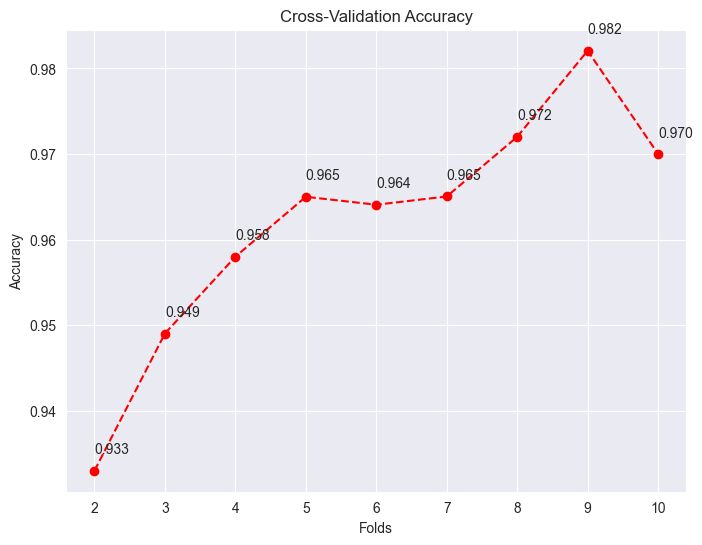

In [116]:
"""
Finally, we are plotting the accuracy results for each k-fold cross validation process.
We've created a line plot with the number of folds (2 to 10) on the x-axis and the corresponding accuracies on the y-axis.
"""

plt.figure(figsize=(8, 6))
plt.plot(list(range(2,11)), accuracies, marker='o', linestyle='--', color='red')
plt.title('Cross-Validation Accuracy')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.grid(True)

for i,j in zip(list(range(2,11)), accuracies):
    plt.annotate('%.3f' % j, xy=(i, j+0.002))
    
plt.show()

In [ ]:
"""
After observing our line plot graph, we can see that as the number of folds increase, from 2 to 9, the accuracy improves, starting at around 0.933 for 2 folds and reaching a peak of 0.982 for 9 folds. However, the accuracy slightly drops to 0.970 at 10 folds. 

The consistent upward trend from folds 2 to 9 indicated that the model benefits from more training data and a more reliable evaluation during cross validation.
The difference between folds 5 to 8 is relatively small, which suggests that our model stabilises in this range.
The drop at fold 10 suggests that overusing too many folds might introduce instability.

Overall, based of our results shown on our graph, our model typically performs well.
"""

x_train shape: (1600, 6)
x_test shape: (400, 6)
y_train shape: (1600,)
y_test shape: (400,)


Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_116 (Dense)               │ (None, 18)             │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 4)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202 (808.00 B)

 Trainable params: 202 (808.00 B)

 Non-trainable params: 0 (0.00 B)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


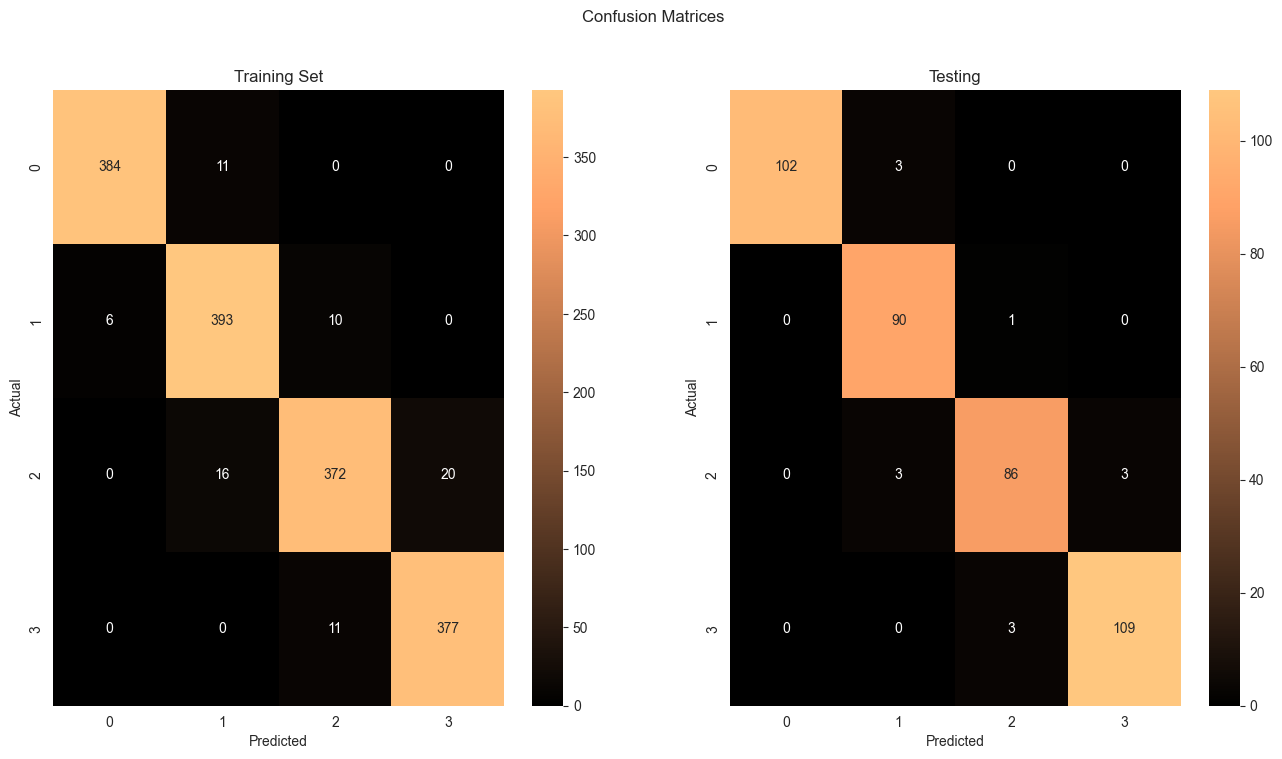

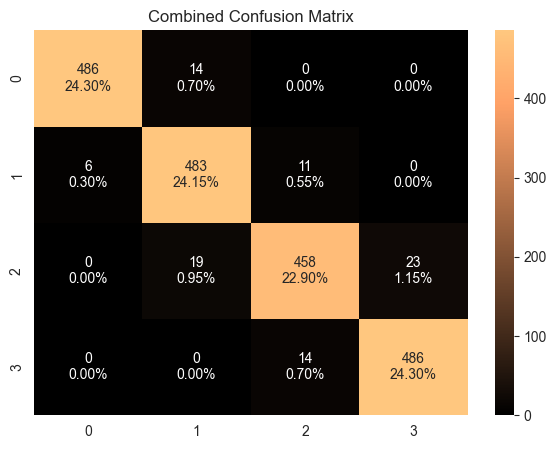

In [40]:
## Confusion Matrices

LEARNING_RATE = 0.001
EPOCH = 40  
MINI_BATCH_SIZE = 10
VERBOSE = 0
NUMBER_OF_CLASSIFICATIONS = 4 
ACTIVATION_FUNCTION = 'relu'
LOSS_FUNCTION = 'sparse_categorical_crossentropy'

# 5 K-folds
x_train, x_test, y_train, y_test = split_and_normalise_data(5)

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

model = ClassificationMultiLayerPerceptron(
    LAYERS = [6, 18],
    EPOCH = EPOCH,
    MINI_BATCH_SIZE = MINI_BATCH_SIZE,
    VERBOSE = VERBOSE,
    NUMBER_OF_CLASSIFICATIONS = NUMBER_OF_CLASSIFICATIONS,
    ACTIVATION_FUNCTION = ACTIVATION_FUNCTION
)

model.get_summary()

model.compile(OPTIMIZER=adam_optimizer, LOSS_FUNCTION='sparse_categorical_crossentropy', METRICS = ['accuracy'])

model.fit(training=(x_train, y_train), testing=(x_test, y_test))

model.generate_confusion_matrix(training=(x_train, y_train), testing=(x_test, y_test))
model.plot_confusion_matrix()


# 
# The confusion matrix is a 4x4 to demonstrate the classification of each input, their actual classification against the predicted.
# The diagonal represents the True Positives, where the model correctly classified the input 
#     (0 classed in 0 and 1 classed in 1, etc)
# The values above the diagonal are False Negatives, where the model predicted to belong in a different class than where they actually belonged. 
#     (0 classed in 1, 2, 3. Looking at the row)
# Values below the diagonal are False Positives, where the outputs belonged in a different class yet predicted incorrectly. 
#     (1, 2, 3 classed into 0. Looking at the column)
# 
# Based on the results the model performs well in classifying the inputs, it is interesting to see how the features 
# determine that the model will not label price category [2, 3] into 0, and similarly [0, 1] into 3.

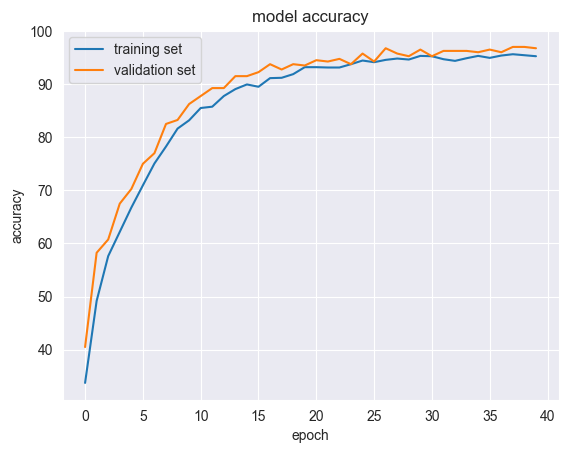

<Figure size 10000x10000 with 0 Axes>

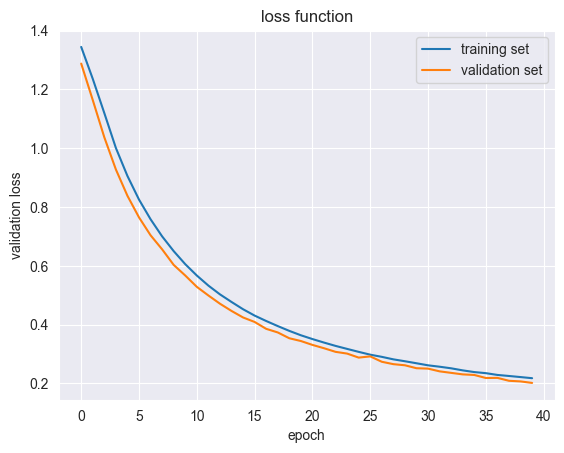

<Figure size 10000x10000 with 0 Axes>

In [41]:
# Plotting of the accuracies and loss over epochs
model.plot_history()

# We can see the model has a little higher accuracy on unseen data, and a little less loss on unseen data.
# This mean the model is able to generalise unseen data well enough.
#
# If the unseen accuracy was declining and loss increasing, the model would be overfitted. 
# Overfitting is when the model's weights are over-tuned to react to the seen data, which makes the weights
# unreliable for generalising unseen data
#
# Underfitting would occur when the loss is diverging early on, and it fails to approach the training set.
# Meaning it cant identify the relationship between the data and the output

In [108]:
# Comparing Different Optimisers 
# From: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# 
# We took a couple of the optimisers found on the TensorFlow documentation and 
# in the next cell we will discuss a few of them, including their performance and where should they be used
optimisers = [
    tf.keras.optimizers.Adadelta(),
    tf.keras.optimizers.Adafactor(),
    tf.keras.optimizers.Adagrad(),
    tf.keras.optimizers.Adam(),
    tf.keras.optimizers.AdamW(),
    tf.keras.optimizers.Adamax(),
    tf.keras.optimizers.Ftrl(),
    tf.keras.optimizers.Lion(),
    tf.keras.optimizers.LossScaleOptimizer(tf.keras.optimizers.Adam()),
    tf.keras.optimizers.Nadam(),
    tf.keras.optimizers.RMSprop(),
    tf.keras.optimizers.SGD(),
]
optim_results = []

# Constants as previously discussed
EPOCH = 40  
MINI_BATCH_SIZE = 10
VERBOSE = 0
NUMBER_OF_CLASSIFICATIONS = 4
ACTIVATION_FUNCTION = 'relu'
LOSS_FUNCTION='sparse_categorical_crossentropy'

# Iter through all the optimisers and run it with the constants
for optimiser in optimisers:
    model = ClassificationMultiLayerPerceptron(
        LAYERS = [6, 18],
        EPOCH = EPOCH,
        MINI_BATCH_SIZE = MINI_BATCH_SIZE,
        VERBOSE = VERBOSE,
        NUMBER_OF_CLASSIFICATIONS = NUMBER_OF_CLASSIFICATIONS,
        ACTIVATION_FUNCTION = ACTIVATION_FUNCTION
    )

    model.compile(OPTIMIZER=optimiser, LOSS_FUNCTION=LOSS_FUNCTION, METRICS = ['accuracy'])
    
    model.fit(training=(x_train, y_train), testing=(x_test, y_test))
    
    # From the history, we will only look at the validation accuracy of the last epoch
    optim_results.append(model.get_history().history['val_accuracy'][-1])

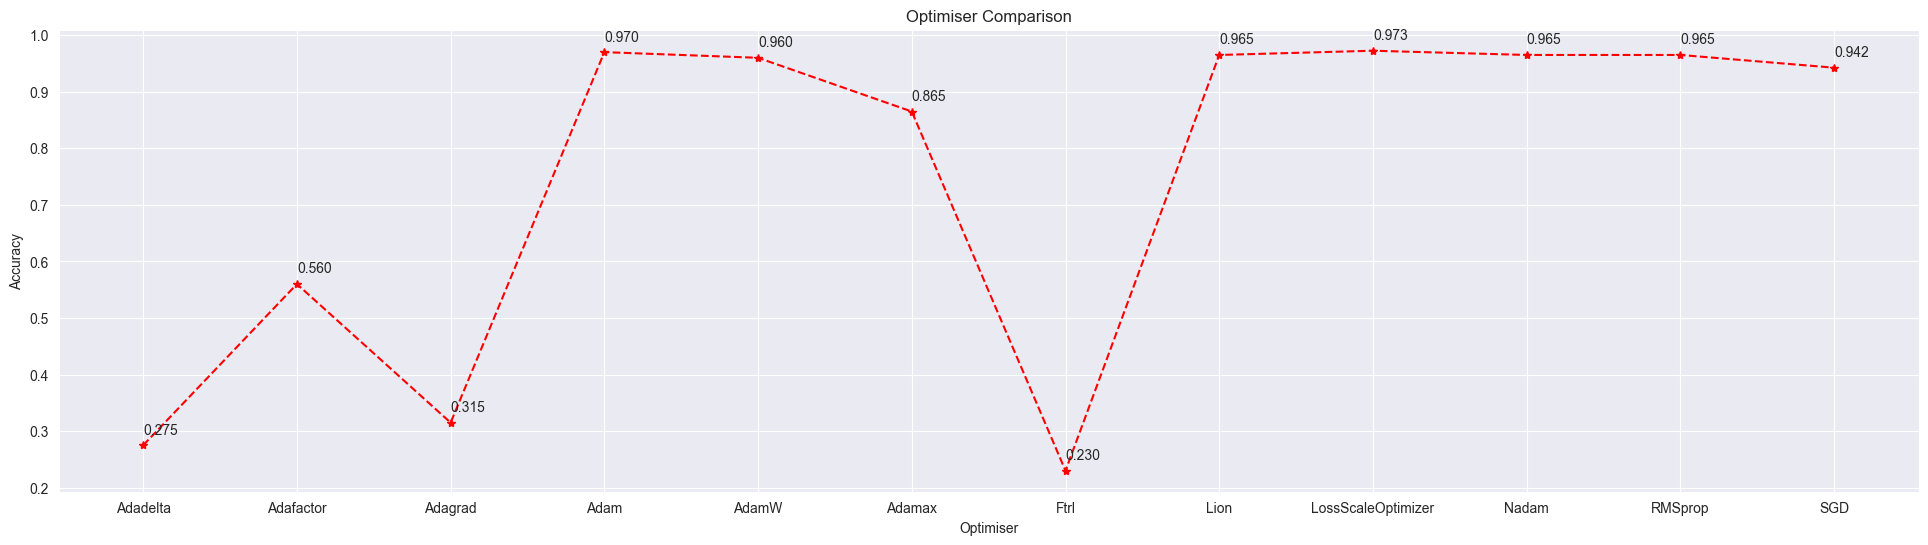

In [109]:
# Plot the results
optimiser_names = [optimiser.__class__.__name__ for optimiser in optimisers]  # Stringify the class names

plt.figure(figsize=(24, 6))
plt.plot(optimiser_names, optim_results, marker='*', linestyle='--', color='red')
plt.title('Optimiser Comparison')
plt.xlabel('Optimiser')
plt.ylabel('Accuracy')
plt.grid(True)

# Annotating the labels: https://stackoverflow.com/questions/6282058/writing-numerical-values-on-the-plot-with-matplotlib
# Top commenter Stephen Terry
for i,j in zip(optimiser_names,optim_results):
    plt.annotate('%.3f' % j, xy=(i, j + 0.02))
    
plt.show()
#
# The table below shows a lot of optimisers have strong accuracy optimisation, and a few that have performed significantly worse (including Adadelta, Adafactor, FTRL)
#
# We have discussed Stochastic Gradient Descent (SGD) and Adam in the lectures. 
# SGD is able to escape from local minimums, but it is slow at converging and can oscillate (https://medium.com/@dancerworld60/stochastic-gradient-descent-40e87ef9bb62) 
# In contrast Adam Optimiser converges faster than SGD which means with less epochs we can notice that difference
#
# Some optimisers to point out from the results:
# Lion - evoLved sIgn mOmeNtum optimiser, discovered by Google Brain, and it is claimed to perform better than AdamW. It is a version of SGD that controls the magnitude of the update. This makes Lion memory efficient and faster convergence than Adam. 
# Github that implements lion: https://github.com/lucidrains/lion-pytorch
# Keras documentation that gives a brief overview on Lion: https://keras.io/api/optimizers/lion/
# In certain tests we ran, Lion had better final accuracy than both Adam and AdamW
#
# AdamW - Modified version of Adam, where the weight decay is normalised by the square root of the velocity. (https://towardsdatascience.com/why-adamw-matters-736223f31b5d)
# 
# Some of the poorly performing optimisers: 
# Adagrad - Adaptive Gradient Algorith, where the learning rate is dynamically updated for each parameter. It is good for models where a constant learning rate applied to all parameters is not great. The problem with Adagrad is the aggressive learning rate decay, which makes the model stop learning early on (Satyam Tripathi, 2024, https://towardsdatascience.com/why-adamw-matters-736223f31b5d). Some usecases for Adagrad is Natural Language Processing, Recommendation Systems and Image Recognition (Satyam Tripathi, 2024)
# Adadelta, Adafactor are variations of Adagrad. 
# Ftrl - Follow the Regularized Leader, an optimiser developed by Google. It is good for shallow models (few layers) and where the data provided has a lot of 0 values (sparse) and rich in features (lot of inputs) (Sheryl Bellary, 2022, https://vevesta.substack.com/p/a-look-into-little-known-but-powerful). Depending on the learning rate power, it can behave like Adagrad.

In [55]:
# Comparing Different Loss Functions
# From: https://www.tensorflow.org/api_docs/python/tf/keras/losses
loss_functions = [
    tf.keras.losses.MeanSquaredError(),
    tf.keras.losses.MeanAbsoluteError(),
    tf.keras.losses.MeanSquaredLogarithmicError(),
    tf.keras.losses.SparseCategoricalCrossentropy(),
    tf.keras.losses.Poisson(),
    tf.keras.losses.LogCosh(),
    tf.keras.losses.MeanAbsolutePercentageError(),
    tf.keras.losses.SquaredHinge(),
]
loss_results = []

# Constants
EPOCH = 40  
MINI_BATCH_SIZE = 10
VERBOSE = 0
NUMBER_OF_CLASSIFICATIONS = 4
ACTIVATION_FUNCTION = 'relu'
OPTIMIZER='adam'

# Taken from Michael Nielson's mnist_loader.py to convert integer expected values to one-hot encoded vectors
# (http://neuralnetworksanddeeplearning.com/chap1.html)
def vectorize_result(j):
    e = np.zeros(4)  # 4 length 1D vector
    e[j] = 1.0
    return e


# Vectorize the results for optimizers other than Spare Categorical Cross Entropy
y_train_vec = np.array([vectorize_result(y) for y in y_train])
y_test_vec = np.array([vectorize_result(y) for y in y_test])

# Convert from list object to numpy arrays
y_train_vec = np.array(y_train_vec)
y_test_vec = np.array(y_test_vec)

# Iter through all the losses and run it with the constants
for loss_function in loss_functions:
    model = ClassificationMultiLayerPerceptron(
        LAYERS = [6, 18],
        EPOCH = EPOCH,
        MINI_BATCH_SIZE = MINI_BATCH_SIZE,
        VERBOSE = VERBOSE,
        NUMBER_OF_CLASSIFICATIONS = NUMBER_OF_CLASSIFICATIONS,
        ACTIVATION_FUNCTION = ACTIVATION_FUNCTION
    )

    model.compile(OPTIMIZER=OPTIMIZER, LOSS_FUNCTION=loss_function, METRICS = ['accuracy'])
    
    if isinstance(loss_function, tf.keras.losses.SparseCategoricalCrossentropy): 
        # If the object passed is Sparse Categorical Cross Entropy, use the integer results
        model.fit(training=(x_train, y_train), testing=(x_test, y_test))  
    else:
        # If it's not SCCE, then use the one-hot encoded vector
        model.fit(training=(x_train, y_train_vec), testing=(x_test, y_test_vec)) 
    
    # From the history, we will only look at the validation accuracy of the last epoch
    loss_results.append(model.get_history().history['val_accuracy'][-1])


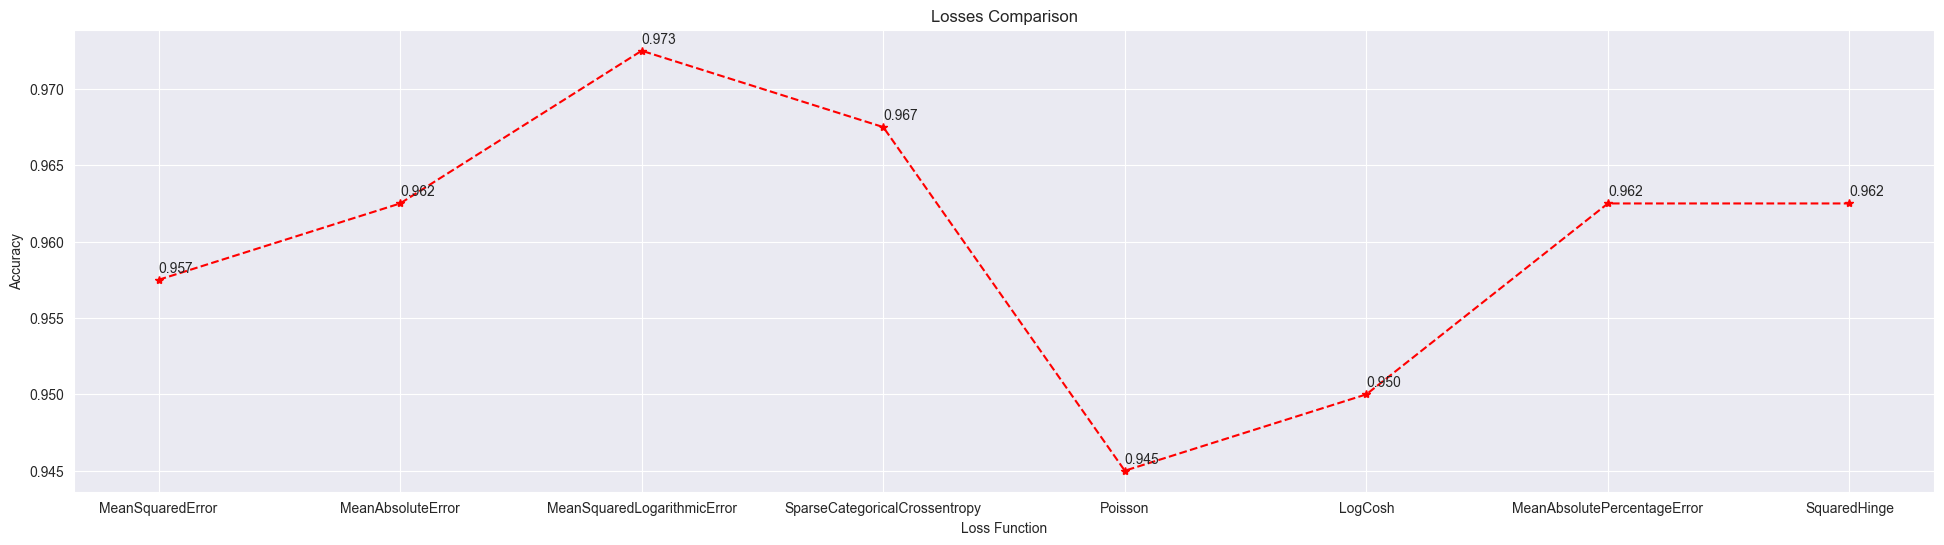

In [56]:
# Plot the results
loss_names = [loss_function.__class__.__name__ for loss_function in loss_functions] # Stringify the class names
plt.figure(figsize=(24, 6))
plt.plot(loss_names, loss_results, marker='*', linestyle='--', color='red')
plt.title('Losses Comparison')
plt.xlabel('Loss Function')
plt.ylabel('Accuracy')
plt.grid(True)

# Annotating the labels: https://stackoverflow.com/questions/6282058/writing-numerical-values-on-the-plot-with-matplotlib
# Top commenter Stephen Terry
for i,j in zip(loss_names,loss_results):
    plt.annotate('%.3f' % j, xy=(i, j + 0.0005))
plt.show()

#
# Originally when tested Sparse Categorical Cross Entropy was performing in the >90% while every other optimizer performed way worse around below <30%
# This is potentially due to our Y values being integers in contrast one-hot encoded vectors (ie: 2 instead of [0, 0, 1, 0])
# Modified the code to take one-hot for everything other than SCCE, and the results are significantly better
#
# Research behind some of the losses and their use cases:
# Poisson - Use case for Poisson distributions which are discrete distributions for statistical probability. IE: the number of times a certain event has occurred, thus it cannot operate with negative numbers. Our dataset clearly does not belong here (Karen Grace-Martin, https://encord.com/glossary/mean-square-error-mse/#:~:text=Use%20Cases,%2C%20polynomial%20regression%2C%20and%20more.)
# Squared Hinge - Used for penalizing missclassifications by taking the max(0 , 1 - Y * model_prediction) ^ 2 where Y is the true classification. The max function enforces the model if the prediction is on the incorrect side of the boundary (ie: if Y is positive and the model prediction is negative) (https://www.netinfo.click/AItools/lesson/?file=Squared+Hinge+Loss&lang=en#:~:text=Squared%20Hinge%20Loss%2C%20defined%20as,learn%20a%20stronger%20decision%20boundary.) 
# Mean Absolute Error - It takes the absolute of our errors, thus always returning positive. This makes it linear in estimation, ie: it cannot tell if the model over or under guessed (because its absolute). It shows an estimate of accuracy. (https://www.deepchecks.com/glossary/mean-absolute-error/#:~:text=The%20importance%20of%20MAE,Resiliency%20to%20outliers.)
# Mean Squared Logarithmic Error - Assumes positive values. It reduces the impact of larger values due to its logarithmic approach, which affects the magnitude of the relative errors. (https://builtin.com/data-science/msle-vs-mse)

#